In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [117]:
path = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"

In [118]:
df = pd.DataFrame(columns=["Path","Label"])

In [119]:
#one vs rest classification for antelope

for i in os.listdir(path):
    for j in os.listdir(path + "/" + i):
        
        if i == "antelope":
            df.loc[len(df.index)] = [i+'/'+j, "1"]
        else:
            df.loc[len(df.index)] = [i+'/'+j, "0"]

In [120]:
df

,Path,Label
0,beetle/687486f1cb.jpg,0
1,beetle/93fb82b04b.jpg,0
2,beetle/7d7f6c9750.jpg,0
3,beetle/0de750893f.jpg,0
4,beetle/2fecd5e844.jpg,0
...,...,...
5395,boar/51c7d65b34.jpg,0
5396,boar/981d244af2.jpg,0
5397,boar/287ebb3999.jpg,0
5398,boar/5d00af3e3f.jpg,0


In [121]:
X = df # Contains all columns.
y = df[['Label']] # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and temp dataframes.
df_train, df_temp, y_train, y_temp = train_test_split(X,
                                                          y,
                                                          stratify=y,
                                                          test_size=0.30,
                                                          random_state=40)

    # Split the temp dataframe into val and test dataframes.

df_val, df_test, y_val, y_test = train_test_split(df_temp,
                                                      y_temp,
                                                      stratify=y_temp,
                                                      test_size=0.5,
                                                      random_state=40)

In [122]:
train = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

In [123]:
train_generator = train.flow_from_dataframe(
    dataframe=df_train,
    directory='/kaggle/input/animal-image-dataset-90-different-animals/animals/animals',
    x_col="Path",
    y_col="Label",
    target_size=(128, 128),
    batch_size=16,
    shuffle=True,
    class_mode='categorical',
    seed=42,
)
valid_generator = train.flow_from_dataframe(
    dataframe=df_val,
    directory='/kaggle/input/animal-image-dataset-90-different-animals/animals/animals',
    x_col="Path",
    y_col="Label",
    target_size=(128, 128),
    batch_size=16,
    shuffle=True,
    class_mode='categorical',
    seed=42
)
test_generator = train.flow_from_dataframe(
    dataframe=df_test,
    directory='/kaggle/input/animal-image-dataset-90-different-animals/animals/animals',
    x_col="Path",
    y_col="Label",
    target_size=(256, 256),
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
)

Found 3780 validated image filenames belonging to 2 classes.
Found 810 validated image filenames belonging to 2 classes.
Found 810 validated image filenames belonging to 2 classes.


In [128]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [129]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1024)           │    51,381,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,569,026 (196.72 MB)

 Trainable params: 51,569,026 (196.72 MB)

 Non-trainable params: 0 (0.00 B)

In [130]:
model.fit(train_generator, epochs=5, validation_data=valid_generator, verbose=1)

Epoch 1/5
  4/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.2031 - loss: 12.3867  

W0000 00:00:1709559376.677122     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 33/237 ━━━━━━━━━━━━━━━━━━━━ 24s 121ms/step - accuracy: 0.7698 - loss: 12.5241

W0000 00:00:1709559380.380051     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9413 - loss: 15.0552

W0000 00:00:1709559400.629515     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


237/237 ━━━━━━━━━━━━━━━━━━━━ 34s 121ms/step - accuracy: 0.9416 - loss: 15.0610 - val_accuracy: 0.9889 - val_loss: 15.9403
Epoch 2/5


W0000 00:00:1709559405.360875     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


237/237 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - accuracy: 0.9859 - loss: 15.8922 - val_accuracy: 0.9889 - val_loss: 15.9403
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 29s 118ms/step - accuracy: 0.9886 - loss: 15.9342 - val_accuracy: 0.9889 - val_loss: 15.9403
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 28s 115ms/step - accuracy: 0.9907 - loss: 15.9681 - val_accuracy: 0.9889 - val_loss: 15.9403
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 28s 116ms/step - accuracy: 0.9897 - loss: 15.9532 - val_accuracy: 0.9889 - val_loss: 15.9403


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
from tensorflow.keras import Sequential, layers

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.math import confusion_matrix
import tensorflow as tf

In [8]:
from tensorflow.keras.optimizers import Adam

In [9]:
import os
import cv2
from PIL import Image
import numpy as np
import pandas as pd

In [10]:
import shutil

In [11]:
import random
import glob

In [105]:
tf.experimental.numpy.experimental_enable_numpy_behavior()

In [12]:
from distutils.dir_util import copy_tree

from_dir = '/kaggle/input/animal-image-dataset-90-different-animals/'
to_dir = '/kaggle/working/'

copy_tree(from_dir, to_dir)

['/kaggle/working/animals/animals/beetle/687486f1cb.jpg',
 '/kaggle/working/animals/animals/beetle/93fb82b04b.jpg',
 '/kaggle/working/animals/animals/beetle/7d7f6c9750.jpg',
 '/kaggle/working/animals/animals/beetle/0de750893f.jpg',
 '/kaggle/working/animals/animals/beetle/2fecd5e844.jpg',
 '/kaggle/working/animals/animals/beetle/514cd025fa.jpg',
 '/kaggle/working/animals/animals/beetle/44931701fe.jpg',
 '/kaggle/working/animals/animals/beetle/138f5c986e.jpg',
 '/kaggle/working/animals/animals/beetle/9977af1a6f.jpg',
 '/kaggle/working/animals/animals/beetle/0f72117666.jpg',
 '/kaggle/working/animals/animals/beetle/5dfc1af2a8.jpg',
 '/kaggle/working/animals/animals/beetle/6543ff7e93.jpg',
 '/kaggle/working/animals/animals/beetle/05f1f4c7c8.jpg',
 '/kaggle/working/animals/animals/beetle/606253cc40.jpg',
 '/kaggle/working/animals/animals/beetle/6aab1daded.jpg',
 '/kaggle/working/animals/animals/beetle/fff3087af1.jpg',
 '/kaggle/working/animals/animals/beetle/77c06b1123.jpg',
 '/kaggle/work

In [15]:
os.chdir("/kaggle/input/animal-image-dataset-90-different-animals/")
f = open("name of the animals.txt", "r")
names = np.loadtxt(f,dtype='str')

In [16]:
list_names = names.tolist()
list_names

['antelope',
 'badger',
 'bat',
 'bear',
 'bee',
 'beetle',
 'bison',
 'boar',
 'butterfly',
 'cat',
 'caterpillar',
 'chimpanzee',
 'cockroach',
 'cow',
 'coyote',
 'crab',
 'crow',
 'deer',
 'dog',
 'dolphin',
 'donkey',
 'dragonfly',
 'duck',
 'eagle',
 'elephant',
 'flamingo',
 'fly',
 'fox',
 'goat',
 'goldfish',
 'goose',
 'gorilla',
 'grasshopper',
 'hamster',
 'hare',
 'hedgehog',
 'hippopotamus',
 'hornbill',
 'horse',
 'hummingbird',
 'hyena',
 'jellyfish',
 'kangaroo',
 'koala',
 'ladybugs',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'mosquito',
 'moth',
 'mouse',
 'octopus',
 'okapi',
 'orangutan',
 'otter',
 'owl',
 'ox',
 'oyster',
 'panda',
 'parrot',
 'pelecaniformes',
 'penguin',
 'pig',
 'pigeon',
 'porcupine',
 'possum',
 'raccoon',
 'rat',
 'reindeer',
 'rhinoceros',
 'sandpiper',
 'seahorse',
 'seal',
 'shark',
 'sheep',
 'snake',
 'sparrow',
 'squid',
 'squirrel',
 'starfish',
 'swan',
 'tiger',
 'turkey',
 'turtle',
 'whale',
 'wolf',
 'wombat',
 'woodpecker',


In [17]:
os.chdir("/kaggle/working/animals/animals/") #change directory path
for animal in names: 
    path="/kaggle/working/animals/animals/"+animal
    for count, filename in enumerate(os.listdir(path)):
        src = filename #source
        dst = animal + str(count) + ".jpg" #destination
            # rename() function will
            # rename all the files
        os.rename(os.path.join(path, src), os.path.join(path, dst)) #use join path to point the correct location

In [18]:
os.chdir("/kaggle/working/animals/animals/") #to make sure we are in the correct directory
for animal in names: 
    path="/kaggle/working/animals/animals/"+animal
    os.chdir(path)
    path2="/kaggle/working/animals/"
    if os.path.isdir(path2+'train/'+animal) is False: #make sure that the structure does not exist and then create it
        os.makedirs(path2+'train/'+animal)
        os.makedirs(path2+'test/'+animal)
        os.makedirs(path2+'valid/'+animal)
        #60 pictures in each folder
        
        for c in random.sample(glob.glob(animal+ '*'),30): #randomly choose 30 picutres
            shutil.move(c,path2+'train/'+animal)
        for c in random.sample(glob.glob(animal+'*'),20): #randomly choose 20 picutres
            shutil.move(c,path2+'valid/'+animal)
        for c in random.sample(glob.glob(animal+'*'),10): #randomly choose 10 picutres
            shutil.move(c,path2+'test/'+animal)

In [19]:
train_path = "/kaggle/working/animals/train"
test_path = "/kaggle/working/animals/test"
valid_path = "/kaggle/working/animals/valid"

In [20]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=list_names, batch_size=5)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=list_names, batch_size=5)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=list_names, batch_size=5, shuffle=False)

Found 2700 images belonging to 90 classes.
Found 1800 images belonging to 90 classes.
Found 900 images belonging to 90 classes.


In [22]:

# def remove_folder_contents(folder):
#     for the_file in os.listdir(folder):
#         file_path = os.path.join(folder, the_file)
#         try:
#             if os.path.isfile(file_path):
#                 os.unlink(file_path)
#             elif os.path.isdir(file_path):
#                 remove_folder_contents(file_path)
#                 os.rmdir(file_path)
#         except Exception as e:
#             print(e)

# folder_path = '/kaggle/working'
# remove_folder_contents(folder_path)
# os.rmdir(folder_path)

In [26]:
model2 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=32, kernel_size=(2, 2), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(1024, activation = 'relu'),
    Dense(units=90, activation='softmax')
])

In [27]:
model2.compile(optimizer=Adam(learning_rate=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
history = model2.fit(x=train_batches,
#     steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
#     validation_steps=len(valid_batches),
    epochs=10,
    verbose=1
)

Epoch 1/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.9335 - loss: 0.2841 - val_accuracy: 0.1961 - val_loss: 5.2116
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - accuracy: 0.9868 - loss: 0.0703 - val_accuracy: 0.1817 - val_loss: 5.8982
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.9728 - loss: 0.1177 - val_accuracy: 0.1933 - val_loss: 6.6034
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 29s 54ms/step - accuracy: 0.9852 - loss: 0.0444 - val_accuracy: 0.1983 - val_loss: 8.2344
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.2106 - val_loss: 7.7852
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.9657 - loss: 0.1753 - val_accuracy: 0.1800 - val_loss: 8.7627
Epoch 7/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - accuracy: 0.9711 - loss: 0.1077 - val_accuracy: 0.1883 - val_loss: 10.7467
Epoch 8/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - accuracy: 0.9918 - loss: 0.0386 -

In [77]:
test_imgs, test_labels = next(test_batches)

In [78]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

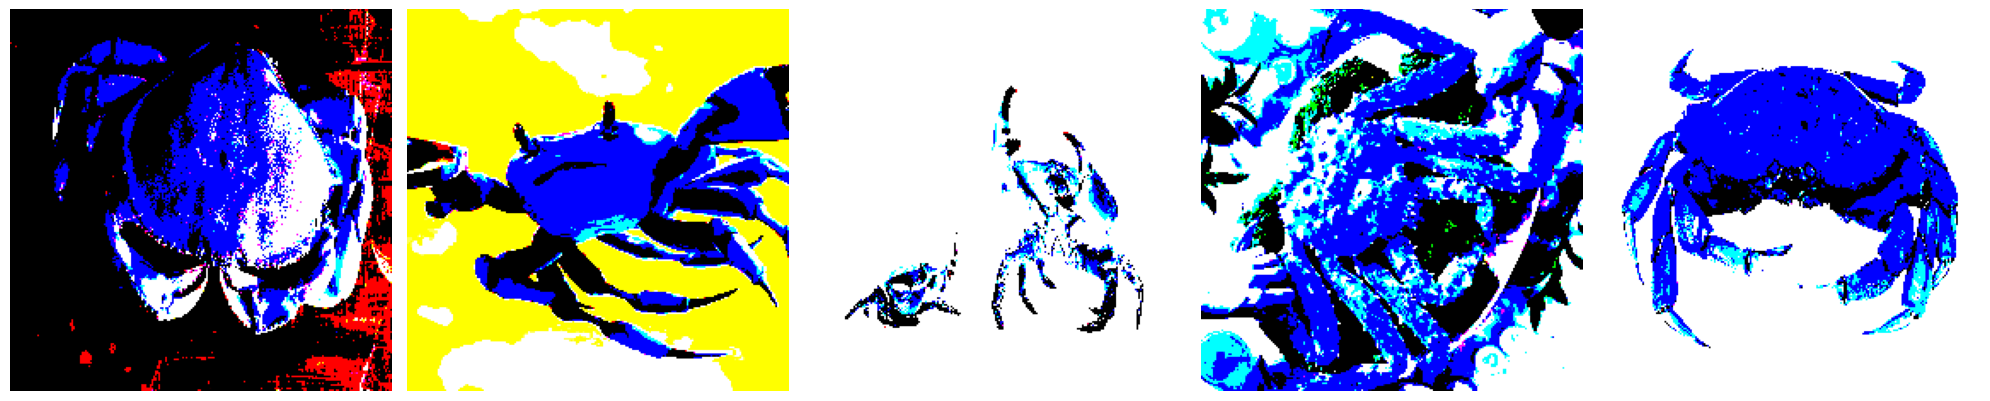

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0

In [79]:
plotImages(test_imgs)
print(test_labels)

In [80]:
predictions = model2.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [82]:
cm = confusion_matrix(test_batches.classes, np.argmax(predictions, axis=-1))

In [83]:
cm

<tf.Tensor: shape=(90, 90), dtype=int32, numpy=
array([[3, 0, 1, ..., 0, 0, 0],
       [0, 4, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 2, 0, 0],
       [0, 0, 2, ..., 0, 3, 0],
       [0, 0, 1, ..., 0, 0, 1]], dtype=int32)>

In [115]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90,fontsize=16)
    plt.yticks(tick_marks, classes,fontsize=16)

    plt.tight_layout()
    plt.ylabel('True label',fontsize=24)
    plt.xlabel('Predicted label',fontsize=24)

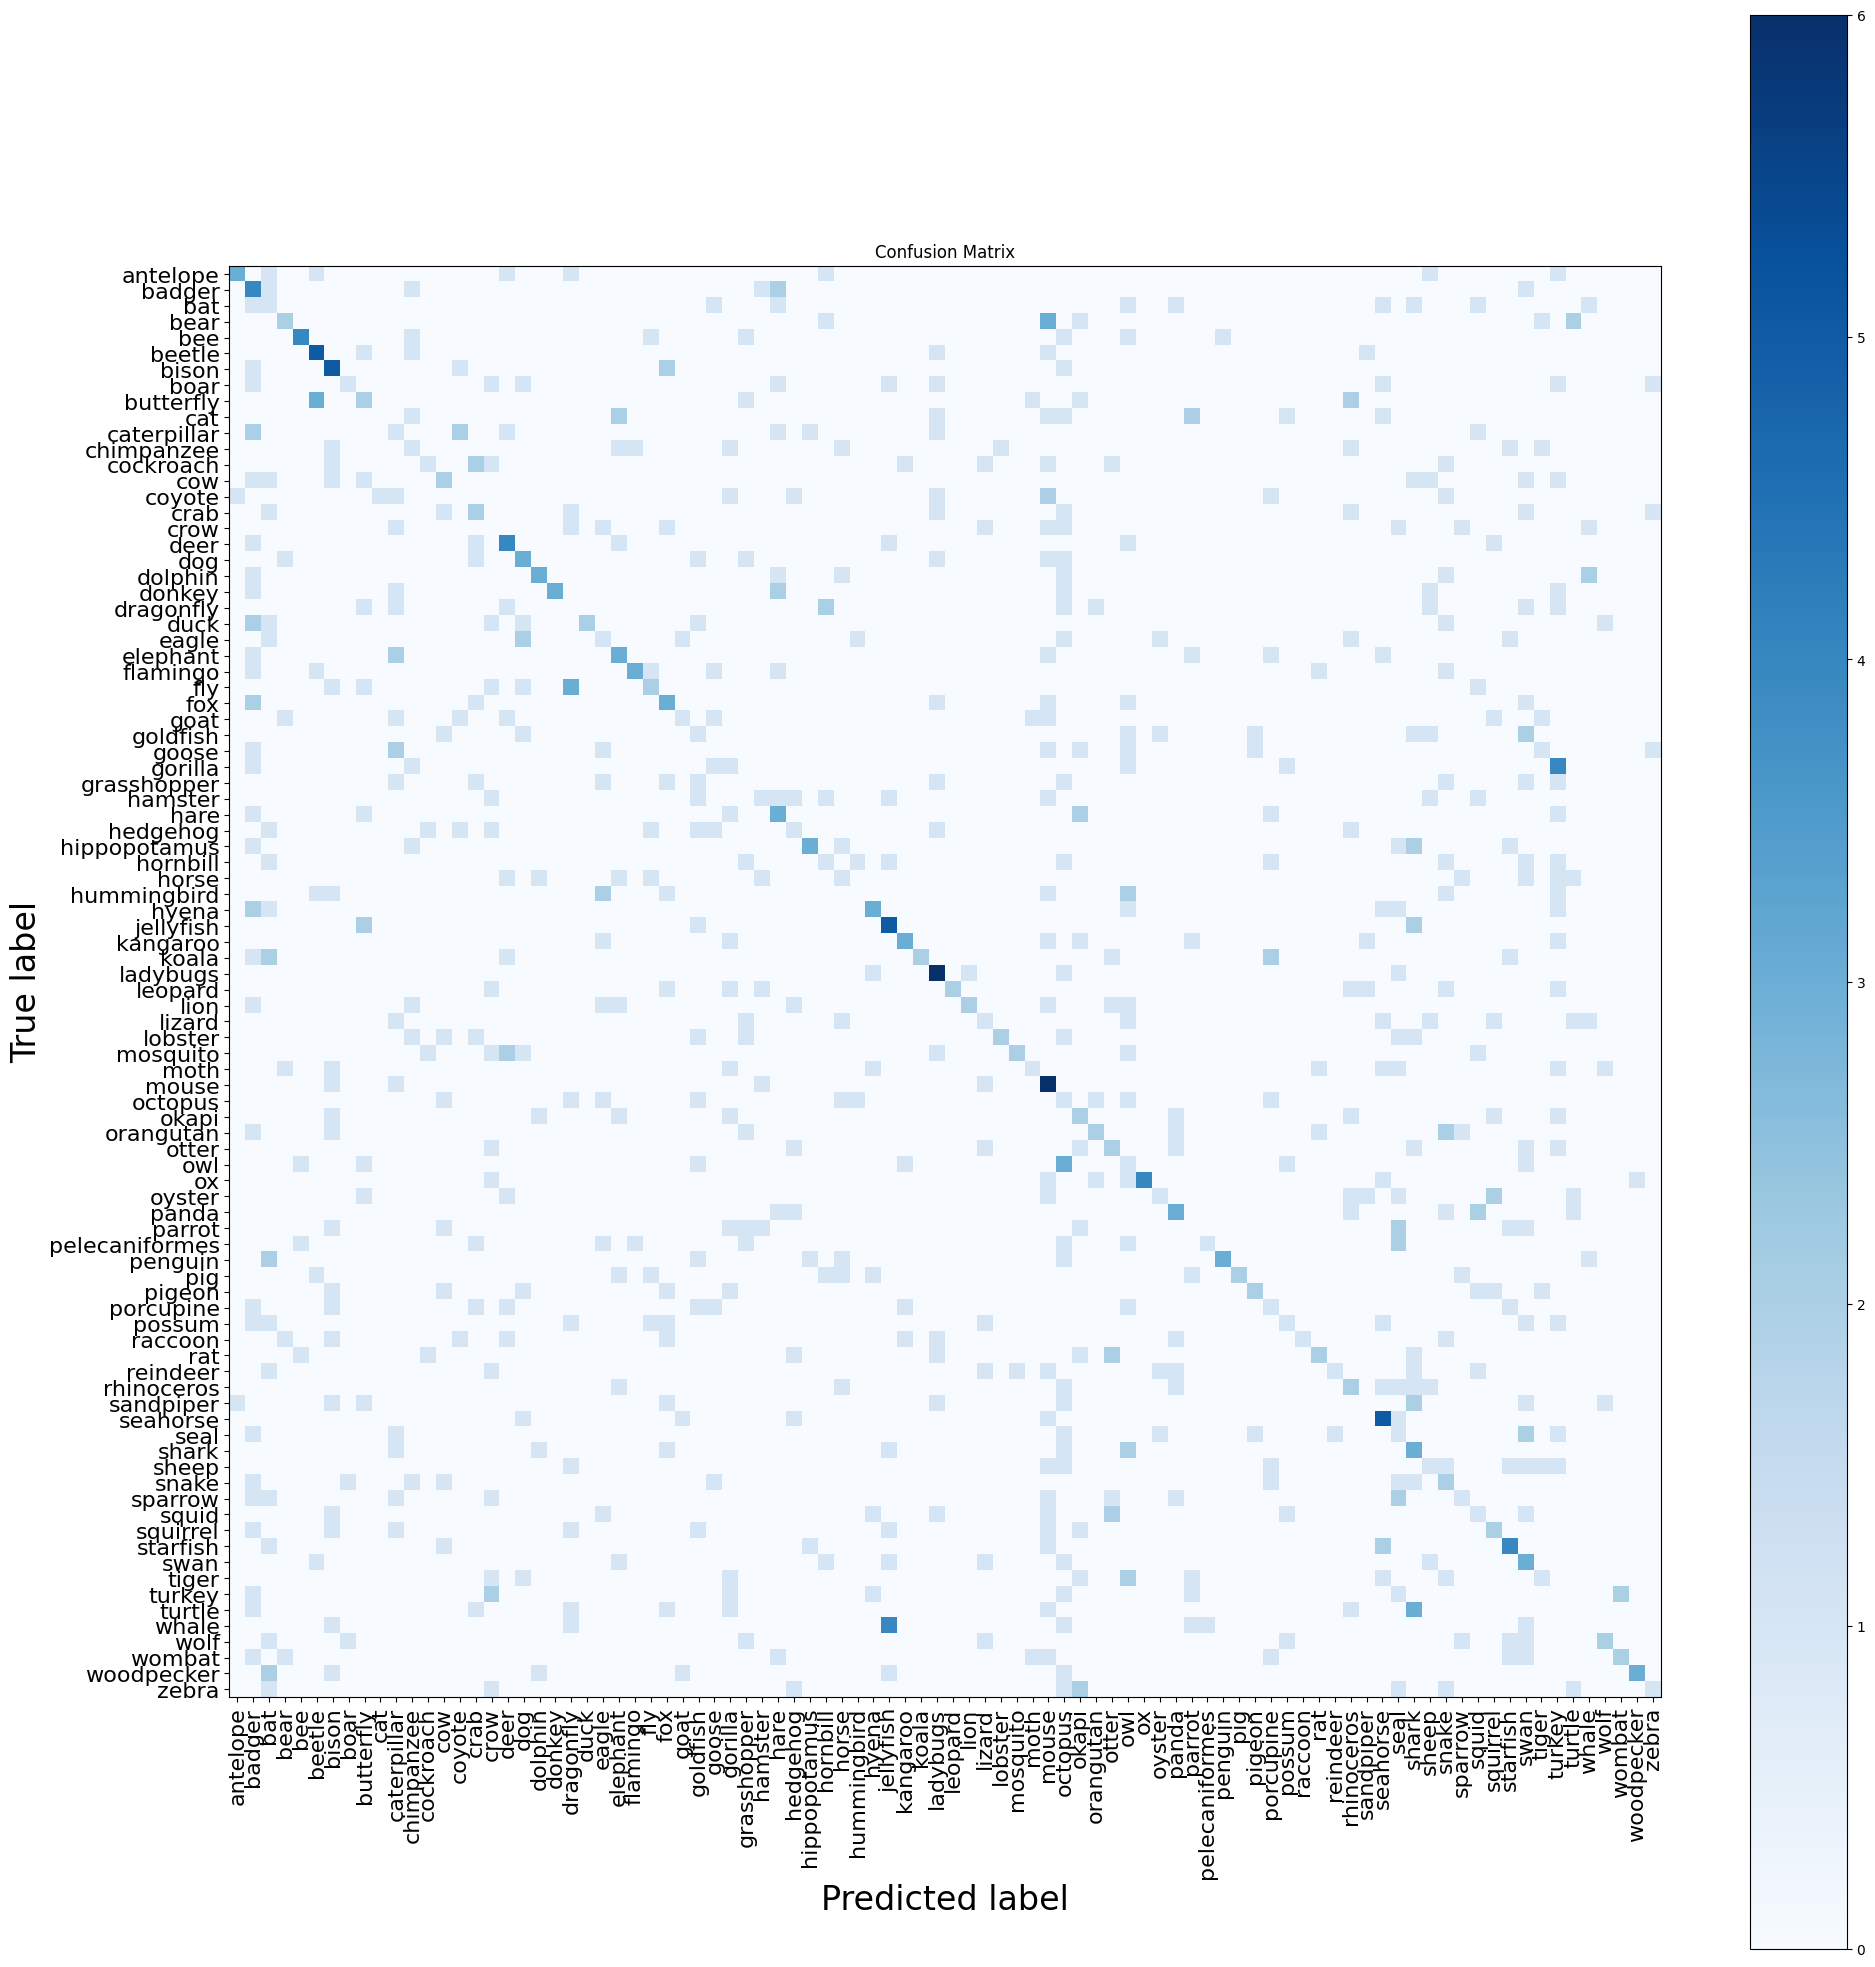

In [116]:
cm_plot_labels = list_names
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')